In [1]:
!git clone https://github.com/HoanChan/TableVision.git

Cloning into 'TableVision'...
remote: Enumerating objects: 124, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 124 (delta 9), reused 38 (delta 5), pack-reused 81
Receiving objects: 100% (124/124), 207.63 MiB | 27.01 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Updating files: 100% (24/24), done.


In [2]:
!git clone https://github.com/microsoft/table-transformer

Cloning into 'table-transformer'...
remote: Enumerating objects: 753, done.
remote: Counting objects: 100% (432/432), done.
remote: Compressing objects: 100% (124/124), done.
remote: Total 753 (delta 337), reused 378 (delta 301), pack-reused 321
Receiving objects: 100% (753/753), 363.46 KiB | 3.56 MiB/s, done.
Resolving deltas: 100% (465/465), done.


In [3]:
!pip install PyMuPDF

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 44.2 MB/s eta 0:00:00


In [4]:
def split_pth_file(input_file, output_file1, output_file2):
    with open(input_file, 'rb') as f:
        data = f.read()

    half_len = len(data) // 2

    with open(output_file1, 'wb') as f1, open(output_file2, 'wb') as f2:
        f1.write(data[:half_len])
        f2.write(data[half_len:])

def combine_pth_files(input_file1, input_file2, output_file):
    with open(input_file1, 'rb') as f1, open(input_file2, 'rb') as f2:
        data1 = f1.read()
        data2 = f2.read()

    combined_data = data1 + data2

    with open(output_file, 'wb') as f:
        f.write(combined_data)

In [5]:
combine_pth_files("/content/TableVision/models/pubtables1m_detection_detr_r18.pth_part1", "/content/TableVision/models/pubtables1m_detection_detr_r18.pth_part2", "/content/TableVision/models/pubtables1m_detection_detr_r18.pth")
combine_pth_files("/content/TableVision/models/pubtables1m_structure_detr_r18.pth_part1", "/content/TableVision/models/pubtables1m_structure_detr_r18.pth_part2", "/content/TableVision/models/pubtables1m_structure_detr_r18.pth")


In [10]:
import sys
from PIL import Image

# Thêm đường dẫn đến thư mục 'src' vào danh sách đường dẫn
sys.path.append('/content/TableVision/')
sys.path.append('/content/table-transformer/')
sys.path.append('/content/table-transformer/src/')
sys.path.append('/content/table-transformer/detr/')

from src.inference import TableExtractionPipeline

# Create inference pipeline
pipe = TableExtractionPipeline(det_config_path='/content/table-transformer/src/detection_config.json',
                               det_model_path='/content/TableVision/models/pubtables1m_detection_detr_r18.pth', det_device='cuda',
                               str_config_path='/content/table-transformer/src/structure_config.json',
                               str_model_path='/content/TableVision/models/pubtables1m_structure_detr_r18.pth', str_device='cuda')

# Recognize table(s) from image

img_path = "/content/TableVision/sample/vn1.jpg"
img = Image.open(img_path)
tokens = {}
extracted_tables = pipe.recognize(img, tokens, out_objects=True, out_cells=True, out_html=True, out_csv=True)

# Select table (there could be more than one)
try:
  extracted_table = extracted_tables[0]
except:
  extracted_table = extracted_tables

# Get output in desired format
objects = extracted_table['objects']
cells = extracted_table['cells']
csv = extracted_table['csv']
html = extracted_table['html']



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 137MB/s]


Detection model initialized.
Detection model weights loaded.
Structure model initialized.
Structure model weights loaded.


In [11]:
from src.inference import visualize_detected_tables, visualize_cells
visualize_detected_tables(img, objects, "/content/1.jpg")
visualize_cells(img, cells[0], "/content/2.jpg")

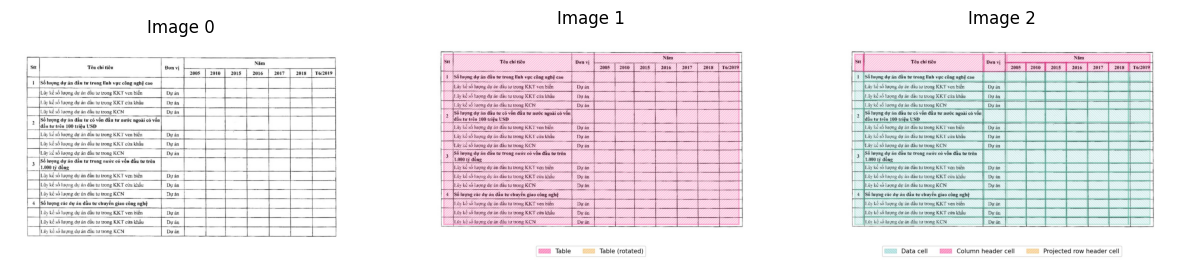

In [12]:
import matplotlib.pyplot as plt
from PIL import Image

img0 = Image.open(img_path)
img1 = Image.open('/content/1.jpg')
img2 = Image.open('/content/2.jpg')

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(img0)
plt.title('Image 0')
plt.axis('off')

plt.subplot(132)
plt.imshow(img1)
plt.title('Image 1')
plt.axis('off')


plt.subplot(133)
plt.imshow(img2)
plt.title('Image 2')
plt.axis('off')

plt.show()
